# Prep

In [1]:
# !pip install pandas
# !pip install matplotlib

# Import libraries
import pandas as pd

from Utils import *

## Global Parameters

In [2]:
# Define the data path
datafile = '../data/static-multimap-data.csv'

output_keys = ['Benchmark', 'Label', 'Distribution', 'NumReps', 'NumInputs', \
               'Occupancy', 'GPU Time (sec)', 'Elem/s (elem/sec)', 'Bandwidth (GB/s)']

# Import Data

In [3]:
# Read csv file
rawdf = pd.read_csv(datafile)

# Filter out skipped tests
perfdf = rawdf[rawdf["Key"] == rawdf["Value"]].reset_index(drop=True)

# Add labels
perfdf.loc[perfdf['NumReps'].isnull(), 'Label'] = perfdf["Key"] + " " + perfdf["Distribution"]
perfdf.loc[perfdf['Distribution'].isnull(), 'Label'] = perfdf["Key"]

perfdf["Bandwidth (GB/s)"] = perfdf["GlobalMem BW (bytes/sec)"] / (1000 * 1000 * 1000)

# Trim data frame for visualization
perfdf = perfdf[output_keys]
#perfdf

# Visualization

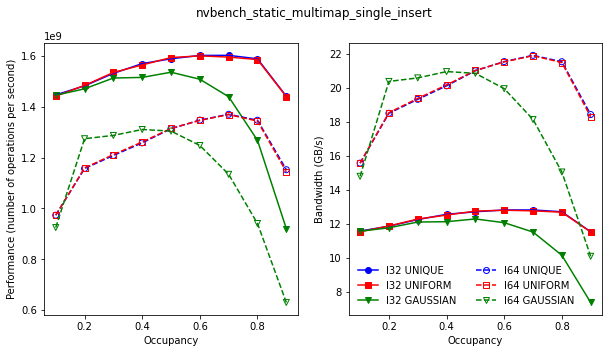

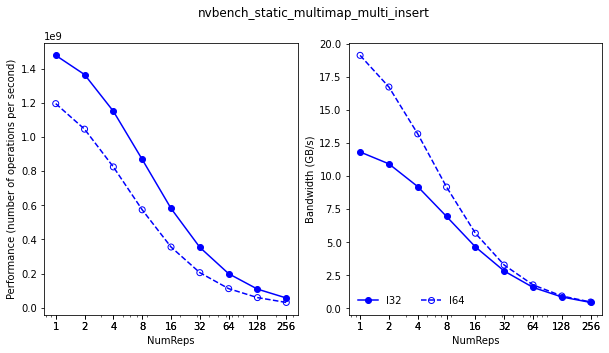

In [4]:
unique_bms = perfdf["Benchmark"].unique()
num_bm   = len(unique_bms)
    
for bindex, bm in enumerate(unique_bms):
    tmpdf = perfdf[perfdf['Benchmark'].str.contains(bm)]
    
    unique_labels = tmpdf["Label"].unique()
    num_labels = len(unique_labels)
    
    flag = 'multi_insert' in bm
    if (flag):
        plot_insert(bm, tmpdf, "NumReps", unique_labels, flag)
    else:
        plot_insert(bm, tmpdf, "Occupancy", unique_labels)